#  <font color=green>Credit Card Fraud Detection Project</font>

Hello!

I am really excited about machine-learning and decided to take on this project as the first of many to get more comfortable the models used. 

This project covers credit card fraud and is meant to look at a dataset of transactions and predict whether it is fraudulent or not. I learned alot of this from 
Eduonix Learning Solutions. 

## Imports 

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

## Data Importing

In [2]:
data = pd.read_csv('cc2.csv')

In [8]:
data.shape

(56961, 31)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


## Exploring the Dataset

In [10]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
data.shape

(56961, 31)

In [12]:
# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(11392, 31)


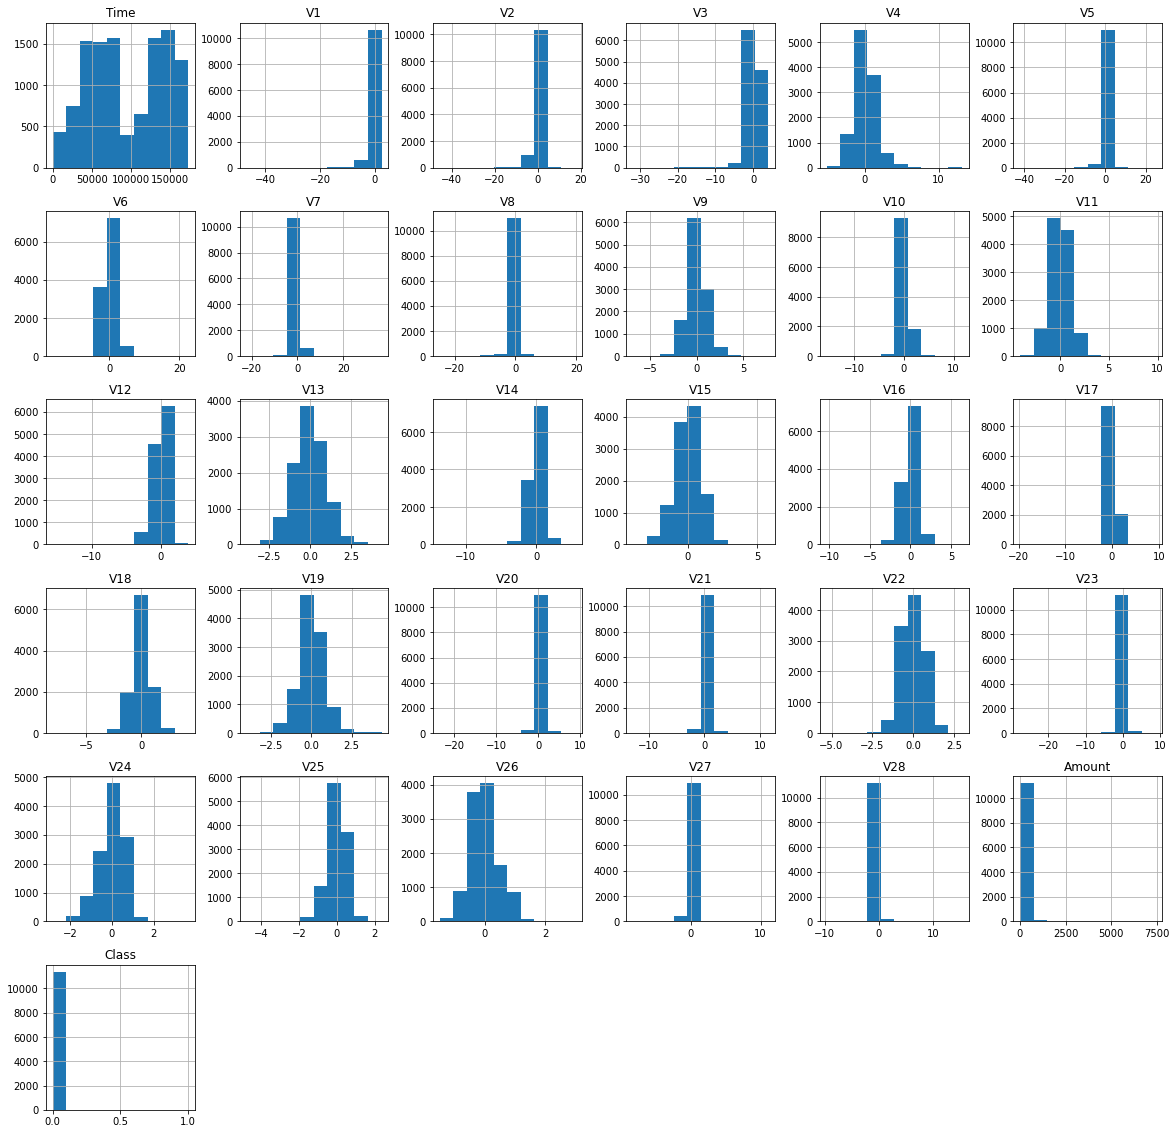

In [13]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

You can see most of the V's are clustered around 0 with some or no outliers. Notice we have very few fraudulent cases over valid cases in our class histogram.

In [14]:
# determine the number of fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0014945054945054944
Fraud Cases: 17
Valid Cases: 11375


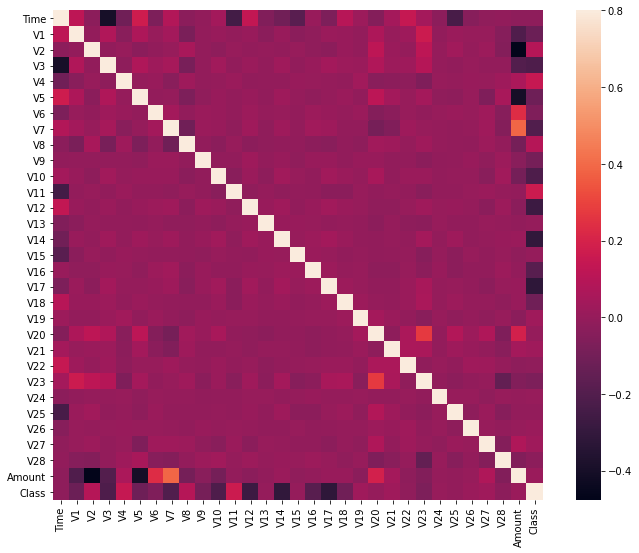

In [15]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

You can see a lot of the values are close to 0 . Most of them are fairly unrelated. The lighter squares signify a stronger correlation. 

## Organizing the Data

In [16]:
# get the columns from the dataframe
columns = data.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = data[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = data[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(11392, 30)
(11392,)


## Applying Algorithms

In [17]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [18]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

## Fit the Model

In [19]:
n_outliers = len(fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    # calculate the number of errors
    n_errors = (y_pred != Y).sum()
    
    # classification matrix
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\Users\ANIKET\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 21
0.9981566011235955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11375
           1       0.39      0.41      0.40        17

    accuracy                           1.00     11392
   macro avg       0.69      0.71      0.70     11392
weighted avg       1.00      1.00      1.00     11392

Local Outlier Factor: 35
0.9969276685393258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11375
           1       0.00      0.00      0.00        17

    accuracy                           1.00     11392
   macro avg       0.50      0.50      0.50     11392
weighted avg       1.00      1.00      1.00     11392



Looking at precision for fraudulent cases (1) lets us know the percentage of cases that are getting correctly labeled. 'Precision' accounts for false-positives. 'Recall' accounts for false-negatives. Low numbers could mean that we are constantly calling clients asking them if they actually made the transaction which could be annoying.

Goal: To get better percentages.

Our Isolation Forest method (which is Random Forest based) was able to produce a better result. Looking at the f1-score 26% (or approx. 30%) of the time we are going to detect the fraudulent transactions.

## Data Quality Checks

In [21]:
# Check null values
data.isnull().sum()

# Basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11392 entries, 36274 to 245901
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11392 non-null  float64
 1   V1      11392 non-null  float64
 2   V2      11392 non-null  float64
 3   V3      11392 non-null  float64
 4   V4      11392 non-null  float64
 5   V5      11392 non-null  float64
 6   V6      11392 non-null  float64
 7   V7      11392 non-null  float64
 8   V8      11392 non-null  float64
 9   V9      11392 non-null  float64
 10  V10     11392 non-null  float64
 11  V11     11392 non-null  float64
 12  V12     11392 non-null  float64
 13  V13     11392 non-null  float64
 14  V14     11392 non-null  float64
 15  V15     11392 non-null  float64
 16  V16     11392 non-null  float64
 17  V17     11392 non-null  float64
 18  V18     11392 non-null  float64
 19  V19     11392 non-null  float64
 20  V20     11392 non-null  float64
 21  V21     11392 non-null  float6

## Data Visualization

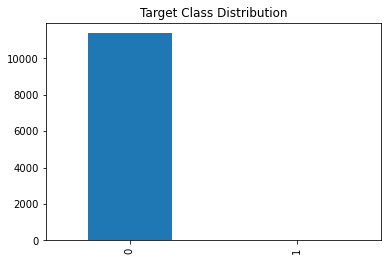

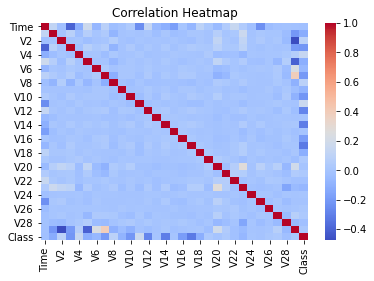

In [22]:
# Target distribution
plt.figure()
data['Class'].value_counts().plot(kind='bar')
plt.title('Target Class Distribution')
plt.show()

# Correlation heatmap
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Chi-Square Test (Categorical vs Target)

In [24]:
from scipy.stats import chi2_contingency

categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    contingency = pd.crosstab(data[col], data['Class'])
    chi2, p, dof, exp = chi2_contingency(contingency)
    print(f"{col}: p-value = {p}")

## Encoding Categorical Variables

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(df[col])

## Feature Scaling & Data Balancing

In [26]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = data.drop('Class', axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

## Model Training & Evaluation

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*40)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2317
           1       0.99      1.00      1.00      2233

    accuracy                           1.00      4550
   macro avg       1.00      1.00      1.00      4550
weighted avg       1.00      1.00      1.00      4550

[[2304   13]
 [   0 2233]]
----------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2317
           1       1.00      1.00      1.00      2233

    accuracy                           1.00      4550
   macro avg       1.00      1.00      1.00      4550
weighted avg       1.00      1.00      1.00      4550

[[2317    0]
 [   0 2233]]
----------------------------------------


## Bias-Variance Trade-off

In [ ]:
# Higher bias: simpler models (Logistic Regression)
# Higher variance: complex models (Random Forest)
# Cross-validation can be used to tune this trade-off